In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5

### Try to read the DAS data from OptoDAS as a standard hdf5 file

Just read the first file's metadata.

In [ ]:
# Identify the path to your data file
firstFile = 'path/to/hdf5/file' # replace with your filename
# create an hdf5 file object to read
f = h5.File(firstFile, 'r')
# print the keys 
list(f.keys())

['acqSpec',
 'cableSpec',
 'data',
 'demodSpec',
 'fileGenerator',
 'fileGeneratorSvnRev',
 'fileVersion',
 'header',
 'instrumentOptions',
 'monitoring',
 'processingChain',
 'sweepSpec',
 'timing',
 'versions']

Now read some of the important header details. 

In [6]:
print(list(f['header']))

['channels', 'computer', 'dataScale', 'dataType', 'dimensionNames', 'dimensionRanges', 'dimensionSizes', 'dimensionUnits', 'dt', 'dx', 'experiment', 'gaugeLength', 'instrument', 'missingSamples', 'name', 'numberOfAuxData', 'phiOffs', 'phiOffsStartTime', 'sensitivities', 'sensitivityUnits', 'sensorType', 'spatialUnwrRange', 'time', 'unit']


Check what kind of data is recorded.

In [40]:
print(f['header']['name'][()])
print(f['header']['unit'][()])

b'Phase rate per meter'
b'rad/(s\xc2\xb7m)'


In [7]:
# after you look at the list of headers, you can choose individual headers to grab values
dt = f['header']['dt'][()] # note the [()] is used to read scalar field valuesin h5py
dx = f['header']['dx'][()]
timeDimUnits = str(f['header']['dimensionUnits'][0])
timeDimUnits = timeDimUnits.strip('b') # comes as b's' so need to remove the b and ' characters
timeDimUnits = timeDimUnits.replace("'", "")
spaceDimUnits = str(f['header']['dimensionUnits'][1])
spaceDimUnits = spaceDimUnits.strip('b')
spaceDimUnits = spaceDimUnits.replace("'", "")
print('dt is '+str(dt)+' '+timeDimUnits)
print('dx is '+str(dx)+' '+spaceDimUnits)
# check the gauge length
gl = f['header']['gaugeLength'][()]
print('gauge length is '+str(gl)+' '+spaceDimUnits)

dt is 6.4e-05 s
dx is 1.0213001907746815 m
gauge length is 8.170401526197452 m


### Read the data and make a basic plot of it

In [9]:
# read the data array
dataArr = f['data']
# check the dimensions of the actual data
dataArr.shape

(156250, 300)

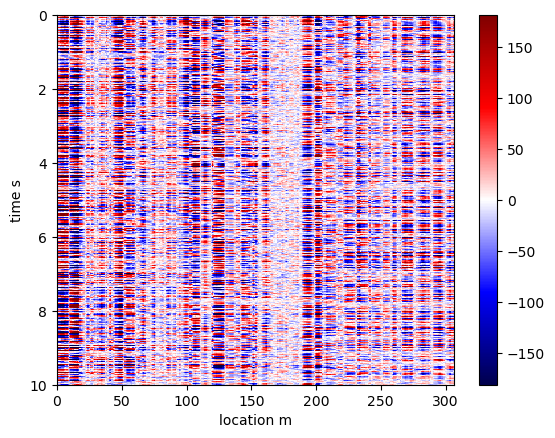

In [10]:
# choose a clip level for colors in plot (99% adaptive to array values, for example)
clipMax = np.percentile(dataArr,99)
# set axis end points
left = 0*dx 
nchannels = dataArr.shape[1]
right = nchannels*dx
ntimes = dataArr.shape[0]
bottom = ntimes*dt
top = 0 # start time (seconds)
# now make the plot
plt.imshow(dataArr, vmin=-clipMax, vmax=clipMax, cmap='seismic', aspect='auto', interpolation='none', extent=(left,right,bottom,top))
plt.xlabel('location '+spaceDimUnits)
plt.ylabel('time '+timeDimUnits)
plt.colorbar()
plt.show()

### A few simple manipulations of data as a numpy array

We can grab one channel an look at it as a single trace.

Text(0.5, 1.0, 'data of channel 100')

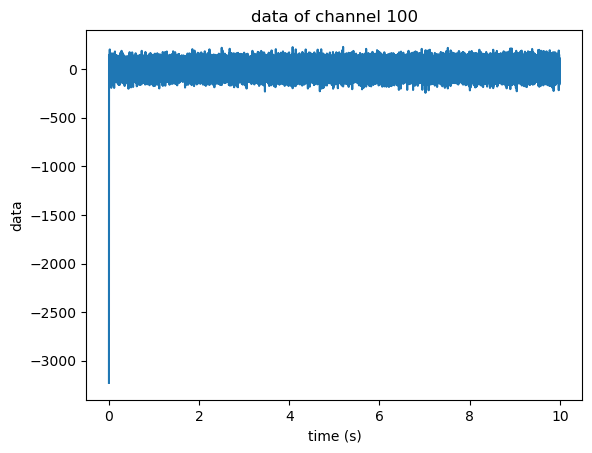

In [44]:
# grab the data from the channel of interest
chOfInterest = 100
trace = dataArr[:,chOfInterest]
# small array of times (s)
times = np.linspace(0, ntimes*dt, num = ntimes)
# plot times versus the data for this channel
plt.plot(times,trace)
plt.xlabel('time ('+timeDimUnits+')')
plt.ylabel('data')
plt.title('data of channel '+str(chOfInterest))

We can zoom in on a small range of times and locations.

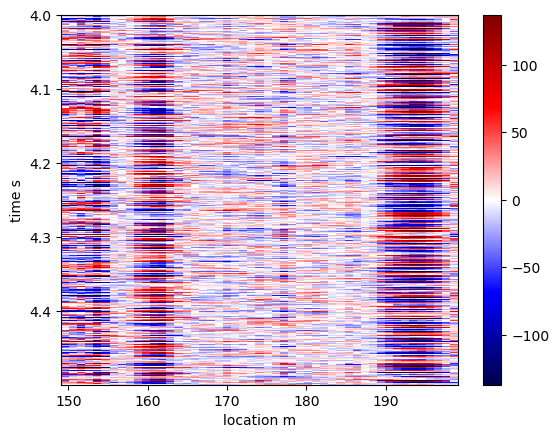

In [53]:
# choose times to zoom in on, and find their index
startTimeZoom = 4 # seconds time to start the zoom
endTimeZoom = 4.5 # seconds time to end the zoom
startTimeID = int(startTimeZoom/dt)
endTimeID = int(endTimeZoom/dt)

# choose what locations to zoom in on, and find their channel index
startLocZoom = 150
endLocZoom = 200
startCh = int(startLocZoom/dx)
endCh = int(endLocZoom/dx)

# now make the zoomed in array (not required, but makes for nicer notation)
zoomArr = dataArr[startTimeID:endTimeID,startCh:endCh]

# choose a clip level for colors in plot (99% adaptive to array values, for example)
clipMax = np.percentile(zoomArr,99)

# set axis end points
left = startCh*dx 
right = endCh*dx
bottom = endTimeID*dt
top = startTimeID*dt

# now make the plot
plt.imshow(zoomArr, vmin=-clipMax, vmax=clipMax, cmap='seismic', aspect='auto', interpolation='none', extent=(left,right,bottom,top))
plt.xlabel('location '+spaceDimUnits)
plt.ylabel('time '+timeDimUnits)
plt.colorbar()
plt.show()